In [1]:
# 759

import pandas as pd
import numpy as np

# T2 = pd.read_csv('StataReg/CountyVaccineMarch27.csv')
# T2 = pd.read_csv('StataReg/CountyVaccineApril07.csv')
T2 = pd.read_csv('StataReg/CountyVaccineApril19.csv')
# first processing

T2
# RawData.loc[newT2.index][['Vax_White', 'Vax_Black', 'Vax_Disparity', 'FluVax_White', 'FluVax_Black', 'FluVax_Disparity',]].mean()


,State,County,AreaName,FIPS,Vax_White,Vax_Black,VaxNumb_White,VaxNumb_Black,Total_Whole,Total_White,...,HighSchool_Disparity,Bachelor_Disparity,IT_Disparity,CnoI_Disparity,noC_Disparity,Above75_Disparity,Unemployment_Disparity,MeanIncome_Disparity,MedianIncome_Disparity,FluVax_Disparity
0,California,Alameda,"Alameda, California",6001,0.272713,0.270879,224604.927990,49941.375150,1671329,823593,...,0.015,0.232,0.096,-0.053,-0.044,0.004083,-0.048,24218.0,56757.0,0.24
1,California,Amador,"Amador, California",6005,0.324251,0.075991,11554.998532,81.005884,39752,35636,...,0.263,0.182,0.344,0.057,-0.408,0.102773,0.070,32510.0,NaN,0.10
2,California,Butte,"Butte, California",6007,0.228574,0.141172,42912.995913,586.991907,219186,187742,...,-0.009,0.068,0.064,-0.087,0.021,0.042232,-0.123,13412.0,23524.0,0.13
3,California,Calaveras,"Calaveras, California",6009,0.241905,0.168666,10100.002995,83.995770,45905,41752,...,0.238,0.065,-0.138,0.061,0.065,0.037466,-0.396,15259.0,NaN,0.08
4,California,Colusa,"Colusa, California",6011,0.102547,0.117030,2013.000112,33.002424,21547,19630,...,-0.030,0.064,-0.012,-0.036,0.045,-0.006429,-0.036,11741.0,40316.0,0.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1288,Virginia,Williamsburg city,"Williamsburg city, Virginia",51830,0.225461,0.156002,2483.000000,373.000000,14954,11013,...,0.154,0.498,0.226,-0.192,-0.037,0.039609,-0.065,11783.0,9393.0,0.20
1289,Virginia,Winchester city,"Winchester city, Virginia",51840,0.124486,0.101134,2846.000000,321.000000,28078,22862,...,0.017,0.214,0.117,-0.028,-0.090,0.036097,0.013,6004.0,3525.0,0.16
1290,Virginia,Wise,"Wise, Virginia",51195,0.229298,0.079093,7925.000000,171.000000,37383,34562,...,0.132,0.117,-0.260,0.166,0.088,0.062452,0.051,7050.0,NaN,0.04
1291,Virginia,Wythe,"Wythe, Virginia",51197,0.155766,0.131301,4225.000000,112.000000,28684,27124,...,0.002,0.107,0.259,-0.123,-0.142,0.007275,-0.007,6620.0,NaN,0.20


# Covid

In [2]:

T2 = pd.read_csv('StataReg/CountyVaccineApril19.csv')

T2 = T2[-T2['Vax_Disparity'].isna()]

print(T2.shape)
T2 = T2[T2['Vax_White'] < 1]
T2 = T2[T2['Vax_Black'] < 1]


T2 = T2[-T2['FluVax_Disparity'].isna()]

print(T2.shape)
T2 = T2[T2['FluVax_White'] < 1]
T2 = T2[T2['FluVax_Black'] < 1]
print(T2.shape)
# print(T2.shape)


(1203, 127)
(968, 127)
(968, 127)


In [3]:
import pandas as pd
# Rate = T2[['Rate_Diff', 'Rate_Black', 'Rate_White',  'FluDiff', 'FluBlack', 'FluWhite',]].mean()*100
# Rate
RawData = T2
print(RawData.shape)

L = []

for idx, row in RawData.iterrows():
    d = row.to_dict()
    dn = {}
    dn['Vaccination'] = 'COVID-19'
    dn['Race'] = 'Black'
    dn['Vaccination Rate (%)'] = d['Vax_Black'] * 100
    L.append(dn)
                    
                    
    dn = {}
    dn['Vaccination'] = 'COVID-19'
    dn['Race'] = 'White'
    dn['Vaccination Rate (%)'] = d['Vax_White']* 100
    L.append(dn)
                    
                    
    dn = {}
    dn['Vaccination'] = 'Flu'
    dn['Race'] = 'Black'
    dn['Vaccination Rate (%)'] = d['FluVax_Black']* 100
    L.append(dn)
    
    dn = {}
    dn['Vaccination'] = 'Flu'
    dn['Race'] = 'White'
    dn['Vaccination Rate (%)'] = d['FluVax_White']* 100
    L.append(dn)
    
newdf = pd.DataFrame(L)
# print(newdf.shape)

(968, 127)


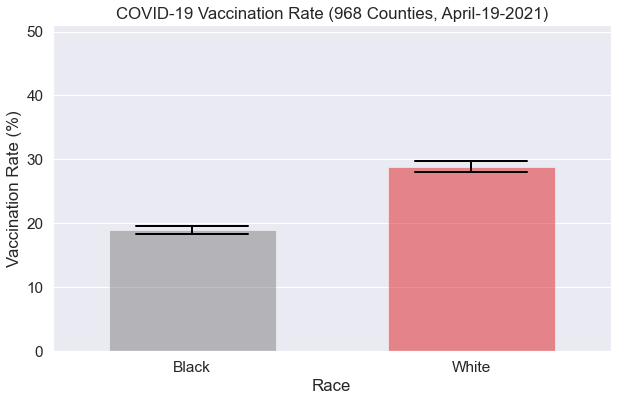

April 19


,Vax_Disparity,Vax_Black,Vax_White
count,968.000000,968.000000,968.000000
mean,0.099366,0.189412,0.288778
std,0.113161,0.083828,0.128560
min,-0.399360,0.018519,0.019582
25%,0.023254,0.132069,0.199222
50%,0.078946,0.181826,0.265165
75%,0.166682,0.230384,0.350721
max,0.554457,0.981982,0.788662


In [4]:
from matplotlib import pyplot as plt
import seaborn as sns

# sns.set_theme(style="ticks")
sns.set_theme(style="whitegrid")
sns.set(font_scale=1.4)


def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

            
# import mylib
newdf = newdf[newdf['Vaccination'] == 'COVID-19']


dims = (10, 6)
# df = mylib.load_data()
fig, ax = plt.subplots(figsize=dims)
# seaborn.violinplot(ax=ax, data=df, **violin_options)
ax.set(ylim=(0, 51))


if True:
    
    # df.to_csv('759_rate.csv')
    ax = sns.barplot(x="Race" , y="Vaccination Rate (%)", palette = ['grey', 'red'], alpha = 0.5,
                     data=newdf, errwidth = 2, errcolor = 'black', capsize=.4)
    
    change_width(ax, 0.6)
    
else:
    ax = sns.barplot(x="Vaccination" , y="Vaccination Rate (%)", hue = 'Race', palette = ['grey', 'red'], alpha = 0.5,
                 data=newdf, errwidth = 2, errcolor = 'black', capsize=.4)





ax.set_title('COVID-19 Vaccination Rate (968 Counties, April-19-2021)')


plt.show()


print('April 19')
Rate = RawData[[ 'Vax_Disparity', 'Vax_Black', 'Vax_White',]].describe()
Rate


(968, 127)


/Users/floydluo/opt/miniconda3/envs/ox/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/floydluo/opt/miniconda3/envs/ox/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[(0.0, 0.12)]

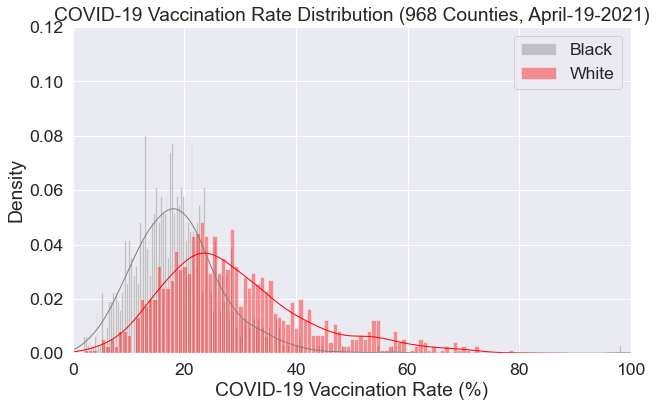

In [10]:
import pandas as pd
from matplotlib import pyplot#  as plt
 
# Rate = T2[['Rate_Diff', 'Rate_Black', 'Rate_White',  'FluDiff', 'FluBlack', 'FluWhite',]].mean()*100
# Rate

RawData = T2
print(RawData.shape)


dims = (10, 6)
# df = mylib.load_data()
fig, ax = pyplot.subplots(figsize=dims)

ax = sns.distplot(RawData['Vax_Black']*100, hist=True, kde=True, 
            bins=int(300), color = 'grey',
            kde_kws={'linewidth': 1}, label='Black')

ax = sns.distplot(RawData['Vax_White']*100, hist=True, kde=True,
            bins=int(100), color = 'red',
            kde_kws={'linewidth': 1}, label='White')

pyplot.legend(loc='best')

ax.set_title('COVID-19 Vaccination Rate Distribution (968 Counties, April-19-2021)')
ax.set(xlabel='COVID-19 Vaccination Rate (%)')
ax.set(ylabel ='Density')
ax.set(xlim=(0, 100))
ax.set(ylim=(0, 0.12))

# Flu

In [6]:
T2 = pd.read_csv('StataReg/CountyVaccineApril19.csv')

T2 = T2[-T2['Vax_Disparity'].isna()]

print(T2.shape)
T2 = T2[T2['Vax_White'] < 1]
T2 = T2[T2['Vax_Black'] < 1]


T2 = T2[-T2['FluVax_Disparity'].isna()]

print(T2.shape)
T2 = T2[T2['FluVax_White'] < 1]
T2 = T2[T2['FluVax_Black'] < 1]
print(T2.shape)
# print(T2.shape)

(1203, 127)
(968, 127)
(968, 127)


In [7]:
import pandas as pd
# Rate = T2[['Rate_Diff', 'Rate_Black', 'Rate_White',  'FluDiff', 'FluBlack', 'FluWhite',]].mean()*100
# Rate
RawData = T2
print(RawData.shape)

L = []

for idx, row in RawData.iterrows():
    d = row.to_dict()
    dn = {}
    dn['Vaccination'] = 'COVID-19'
    dn['Race'] = 'Black'
    dn['Vaccination Rate (%)'] = d['Vax_Black'] * 100
    L.append(dn)
                    
                    
    dn = {}
    dn['Vaccination'] = 'COVID-19'
    dn['Race'] = 'White'
    dn['Vaccination Rate (%)'] = d['Vax_White']* 100
    L.append(dn)
                    
                    
    dn = {}
    dn['Vaccination'] = 'Flu'
    dn['Race'] = 'Black'
    dn['Vaccination Rate (%)'] = d['FluVax_Black']* 100
    L.append(dn)
    
    dn = {}
    dn['Vaccination'] = 'Flu'
    dn['Race'] = 'White'
    dn['Vaccination Rate (%)'] = d['FluVax_White']* 100
    L.append(dn)
    
newdf = pd.DataFrame(L)
# print(newdf.shape)

(968, 127)


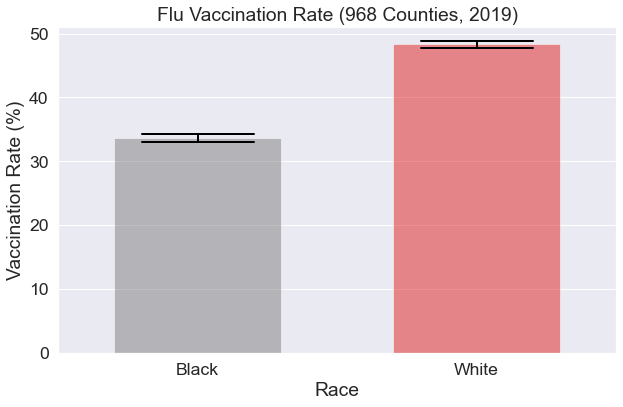

April 19


,FluVax_Disparity,FluVax_Black,FluVax_White
count,968.000000,968.000000,968.000000
mean,0.146880,0.336312,0.483192
std,0.081638,0.098352,0.083717
min,-0.220000,0.000000,0.110000
25%,0.100000,0.290000,0.430000
50%,0.150000,0.340000,0.500000
75%,0.190000,0.390000,0.540000
max,0.510000,0.760000,0.670000


In [8]:
from matplotlib import pyplot as plt
import seaborn as sns

# sns.set_theme(style="ticks")
sns.set_theme(style="whitegrid")
sns.set(font_scale=1.6)



def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

            
# import mylib
newdf = newdf[newdf['Vaccination'] == 'Flu']


dims = (10, 6)
# df = mylib.load_data()
fig, ax = plt.subplots(figsize=dims)
# seaborn.violinplot(ax=ax, data=df, **violin_options)
ax.set(ylim=(0, 51))


if True:
    
    # df.to_csv('759_rate.csv')
    ax = sns.barplot(x="Race" , y="Vaccination Rate (%)", palette = ['grey', 'red'], alpha = 0.5,
                     data=newdf, errwidth = 2, errcolor = 'black', capsize=.4)
    
    change_width(ax, 0.6)
    
else:
    ax = sns.barplot(x="Vaccination" , y="Vaccination Rate (%)", hue = 'Race', palette = ['grey', 'red'], alpha = 0.5,
                 data=newdf, errwidth = 2, errcolor = 'black', capsize=.4)



ax.set_title('Flu Vaccination Rate (968 Counties, 2019)')


plt.show()


print('April 19')
Rate = RawData[[ 'FluVax_Disparity', 'FluVax_Black', 'FluVax_White',]].describe()
Rate

(968, 127)


/Users/floydluo/opt/miniconda3/envs/ox/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/floydluo/opt/miniconda3/envs/ox/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[(0.0, 0.12)]

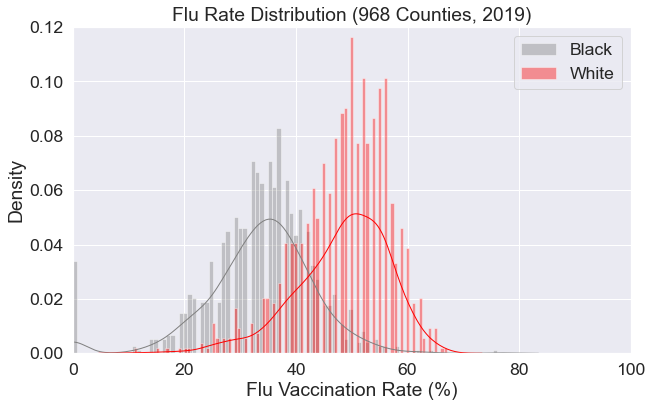

In [9]:
import pandas as pd
from matplotlib import pyplot#  as plt
 
# Rate = T2[['Rate_Diff', 'Rate_Black', 'Rate_White',  'FluDiff', 'FluBlack', 'FluWhite',]].mean()*100
# Rate

RawData = T2
print(RawData.shape)


dims = (10, 6)
# df = mylib.load_data()
fig, ax = pyplot.subplots(figsize=dims)

ax = sns.distplot(RawData['FluVax_Black']*100, hist=True, kde=True, 
            bins=int(100), color = 'grey',
            kde_kws={'linewidth': 1}, label='Black')

ax = sns.distplot(RawData['FluVax_White']*100, hist=True, kde=True,
            bins=int(100), color = 'red',
            kde_kws={'linewidth': 1}, label='White')

pyplot.legend(loc='best')

ax.set_title('Flu Rate Distribution (968 Counties, 2019)')
ax.set(xlabel='Flu Vaccination Rate (%)')
ax.set(ylabel ='Density')
ax.set(xlim=(0, 100))
ax.set(ylim=(0, 0.12))